In [5]:
import math
import matplotlib.pyplot as plt
from random import random

I = 0.746824    # integral de e ** (-x*x) em [0, 1]
J = 0.886227    # integral de e ** (-x*x) em [0, 10]

A = math.e / (math.e - 1)
B = math.e ** 10 / (math.e ** 10 - 1)

xCoord = [10 ** i for i in range(1, 7)]

In [6]:
def g(x):
    return math.e ** (-x*x)

def h(x, A):
    return A * math.e ** (-x)

def sampling_h(u, A):
    return -math.log(1 - u/A)

def sample_average(f, n, b):
    a = 0
    for i in range(1, n + 1):
        s = f(b * random())
        a = (s + (i - 1) * a) / i
    return b * a

def importance_sampling_average(f, n, A):
    a = 0
    for i in range(1, n + 1):
        r = sampling_h(random(), A)
        s = f(r)/h(r, A)
        a = (s + (i - 1) * a) / i
    return a

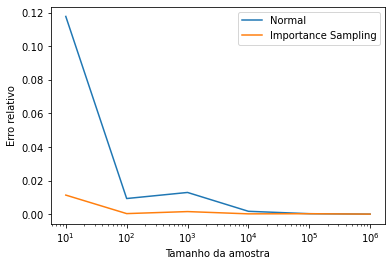

In [7]:
yCoordSampling = []
yCoordImportance = []
plt.xscale('log')

for i in xCoord:
    y = sample_average(g, i, 1)
    yCoordSampling.append(abs(y - I) / I)

plt.plot(xCoord, yCoordSampling, label='Normal')

for i in xCoord:
    y = importance_sampling_average(g, i, A)
    yCoordImportance.append(abs(y - I) / I)

plt.plot(xCoord, yCoordImportance, label='Importance Sampling')
plt.legend()
plt.xlabel('Tamanho da amostra')
plt.ylabel('Erro relativo')
plt.show()

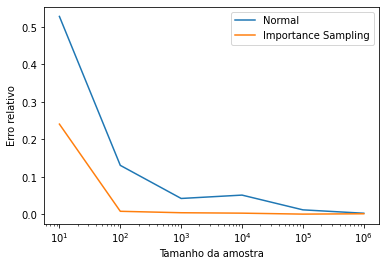

In [15]:
yCoordSampling = []
yCoordImportance = []
plt.xscale('log')

for i in xCoord:
    y = sample_average(g, i, 10)
    yCoordSampling.append(abs(y - J) / J)

plt.plot(xCoord, yCoordSampling, label='Normal')

for i in xCoord:
    y = importance_sampling_average(g, i, B)
    yCoordImportance.append(abs(y - J) / J)

plt.plot(xCoord, yCoordImportance, label='Importance Sampling')
plt.legend()
plt.xlabel('Tamanho da amostra')
plt.ylabel('Erro relativo')
plt.savefig('comparacao_importance_sampling_intervalo_grande3.png')
plt.show()